In [ ]:
#default_exp experiments

In [ ]:
%load_ext autoreload
%autoreload 2
from pwc_gabor_layer.core import GaborLayer, SigmaRegularizer
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

## First load mnist 

Data processing as in the tensorflow datasets tutorial, this is just for an example. And more specifically for fixing issues with backpropagtion!

In [ ]:
(ds_train, ds_test), ds_info = tfds.load('mnist', split=['train', 'test'], shuffle_files=True, 
                         as_supervised=True, with_info=True)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

Some MNIST examples.

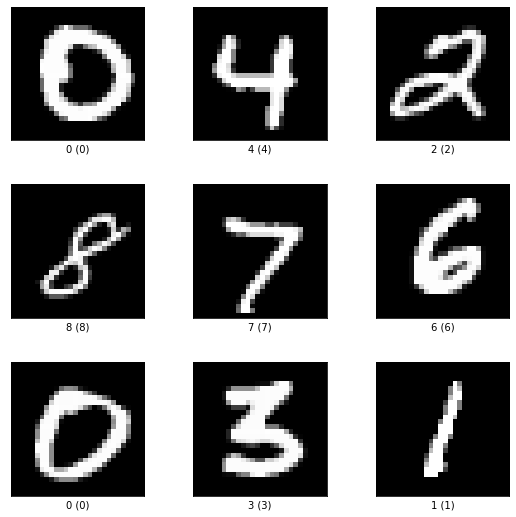

In [ ]:
# tfds.show_examples does not go with supervised features
ds_viz, viz_info = tfds.load('mnist', split='test', shuffle_files=True, 
                         as_supervised=False, with_info=True)

tfds.show_examples(ds_viz, viz_info);

# Some settings for later
ds_viz = ds_viz.batch(16)
ds_viz = ds_viz.cache()

## Apply kernel to MNIST

In [ ]:
GL = GaborLayer(filters=2, kernel_size=(7, 7), orientations=8, use_alphas=False, activation=None)
GL.build([None, 28, 28, 1])

Get a single element of MNIST dataset

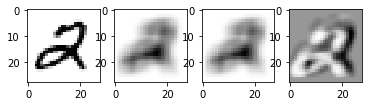

In [ ]:
one_batch = np.stack(list(ds_viz))[0]['image']

blub = GL.call(tf.cast(one_batch[:1, :, :, :]/255, tf.float32))

n1 = 6; n2 = n1 + 1

plt.subplot(141)
plt.imshow(one_batch[0,:,:,0], cmap='Greys')
plt.subplot(142)
plt.imshow(blub[0, :, :, n1], cmap='Greys')
plt.subplot(143)
plt.imshow(blub[0, :, :, n2], cmap='Greys')
plt.subplot(144)
plt.imshow(blub[0, :, :, n1]-blub[0, :, :, n2], cmap='Greys')

In [ ]:
from pwc_gabor_layer.lenet import LeNet

In [ ]:
lenet_gabor =  LeNet(learn_orientations=False, sigma_regularizer=SigmaRegularizer(factor=0.5), input_channels=1,
                kernels1=2, kernels2=None)

lenet_gabor.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
lenet_gabor.fit(ds_train, validation_data=ds_test, epochs=5)

Epoch 1/5
469/469 [==============================] - 23s 49ms/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.0444 - val_accuracy: 0.9874
Epoch 2/5
469/469 [==============================] - 25s 53ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0470 - val_accuracy: 0.9863
Epoch 3/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0536 - val_accuracy: 0.9853
Epoch 4/5
450/469 [===========================>..] - ETA: 1s - loss: 0.0239 - accuracy: 0.9923

In [ ]:
lenet_gabor.summary()

Model: "le_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gabor_block (GaborBlock)     multiple                  358       
_________________________________________________________________
gabor_block_1 (GaborBlock)   multiple                  1008      
_________________________________________________________________
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  65792     
_________________________________________________________________
dense_2 (Dense)              multiple                  2570      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0    

In [ ]:
lenet_cnn =  LeNet(learn_orientations=False, input_channels=1,
                kernels1=None, kernels2=None)

lenet_cnn.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
lenet_cnn.fit(ds_train, validation_data=ds_test, epochs=5)

Epoch 1/5
469/469 [==============================] - 22s 48ms/step - loss: 0.2519 - accuracy: 0.9214 - val_loss: 0.0687 - val_accuracy: 0.9768
Epoch 2/5
469/469 [==============================] - 22s 46ms/step - loss: 0.0644 - accuracy: 0.9801 - val_loss: 0.0784 - val_accuracy: 0.9741
Epoch 3/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0435 - accuracy: 0.9861 - val_loss: 0.0397 - val_accuracy: 0.9877
Epoch 4/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.0299 - val_accuracy: 0.9900
Epoch 5/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0310 - val_accuracy: 0.9896


In [ ]:
lenet_cnn.summary()

Model: "le_net_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            multiple                  156       
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  2416      
_________________________________________________________________
dense_3 (Dense)              multiple                  200960    
_________________________________________________________________
dense_4 (Dense)              multiple                  65792     
_________________________________________________________________
dense_5 (Dense)              multiple                  2570      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0  